In [1]:
import numpy as np
import copy
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import seed
np.random.seed(2095)

# Feattures and Descriptions:


ALQ120Q: How often drink alcohol over past 12 mos \
BMXBMI: Body Mass Index (kg/m**2)\
BMXHT: Standing Height (cm)\
BMXLEG: Upper Leg Length (cm)\
BMXWAIST: Waist Circumference (cm)\
BMXWT: Weight (kg)\
BPQ020: Ever told you had high blood pressure\
DMDEDUC2: Education Level - Adults 20+\
INDHHINC: Annual Household Income\
LBXTC: Total cholesterol (mg/dL)\
MCQ250A: Blood relatives have diabetes\
PAQ180: Avg level of physical activity each day\
RIAGENDR: Gender\
RIDAGEYR: Age at Screening Adjudicated - Recode\
RIDRETH1: Race/Ethnicity - Recode\
SMD030: Age started smoking cigarets regularly


In [2]:
Data= pd.read_csv('diabetes_pima.csv')
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
Data["Outcome"].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [4]:
Data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
Data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
Data.shape

(768, 9)

In [7]:
Data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

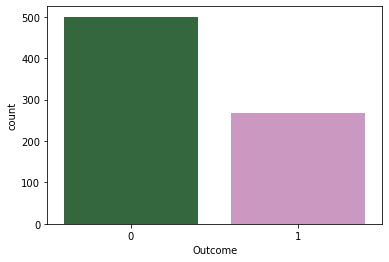

In [8]:
#Data["status"].value_counts().sort_index().plot.barh()
import seaborn as sns
sns.countplot(x ='Outcome', data = Data, palette='cubehelix')

In [9]:
Data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
Data = Data.astype(float)


In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


<AxesSubplot:>

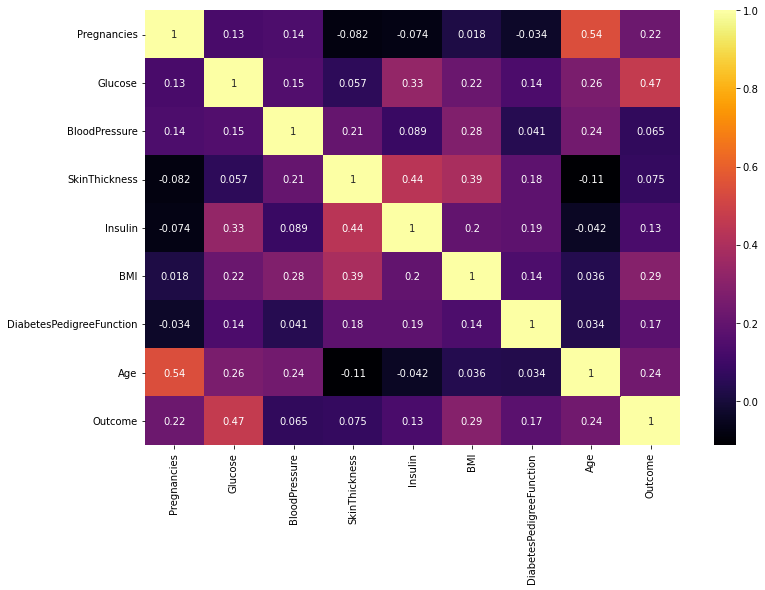

In [13]:
import seaborn as sns
plt.subplots(figsize=(12,8))
sns.heatmap(Data.corr(),cmap='inferno', annot=True)

## Boxplot

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Pregnancies'),
  Text(2, 0, 'Glucose'),
  Text(3, 0, 'BloodPressure'),
  Text(4, 0, 'SkinThickness'),
  Text(5, 0, 'Insulin'),
  Text(6, 0, 'BMI'),
  Text(7, 0, 'DiabetesPedigreeFunction'),
  Text(8, 0, 'Age'),
  Text(9, 0, 'Outcome')])

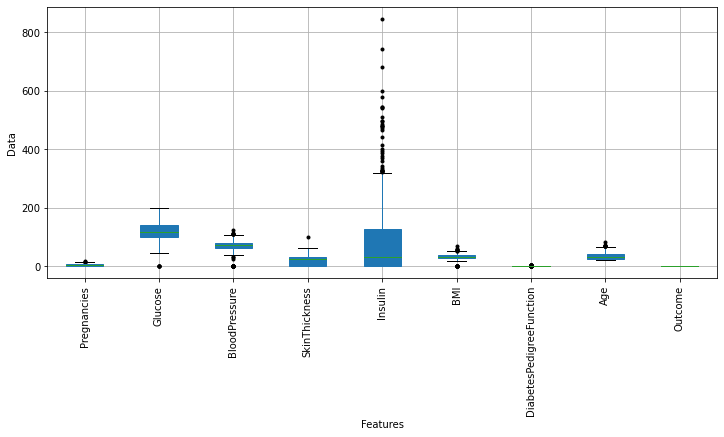

In [14]:
plt.subplots(figsize=(12,5))
Data.boxplot(patch_artist=True, sym="k.")
plt.xlabel('Features')
plt.ylabel('Data')
plt.xticks(rotation=90)

In [15]:
minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag

In [16]:
def  remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    
    median = X[feature].median()
    
    """
    # any value beyond the acceptance range are considered
    as outliers. 
    # we replace the outliers with the median value of that 
      feature.
    """
    
    X.loc[X[feature] < minimum, feature] = median 
    X.loc[X[feature] > maximum, feature] = median

# taking all the columns except the last one
# last column is the label

X = Data.iloc[:, :-1]
for i in range(len(X.columns)): 
        remove_outlier(X.columns[i])

/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-16-c55efc618713>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] < minimum, feature] = median
/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inpu

In [17]:
X = Data.iloc[:, :-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.6270,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.3510,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.6720,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,0.3725,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.1710,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.3400,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.2450,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.3490,47.0


In [18]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

BloodPressure Contains Outlier
Insulin Contains Outlier
BMI Contains Outlier
DiabetesPedigreeFunction Contains Outlier
Age Contains Outlier


In [19]:
for i in range (50):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-16-c55efc618713>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] < minimum, feature] = median
/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inpu

/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-16-c55efc618713>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] < minimum, feature] = median
/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inpu

<ipython-input-16-c55efc618713>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] > maximum, feature] = median
/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-16-c55efc618713>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] < minimum, feature] = median
/usr/lib/python3/dist-packages/pan

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Pregnancies'),
  Text(2, 0, 'Glucose'),
  Text(3, 0, 'BloodPressure'),
  Text(4, 0, 'SkinThickness'),
  Text(5, 0, 'Insulin'),
  Text(6, 0, 'BMI'),
  Text(7, 0, 'DiabetesPedigreeFunction'),
  Text(8, 0, 'Age')])

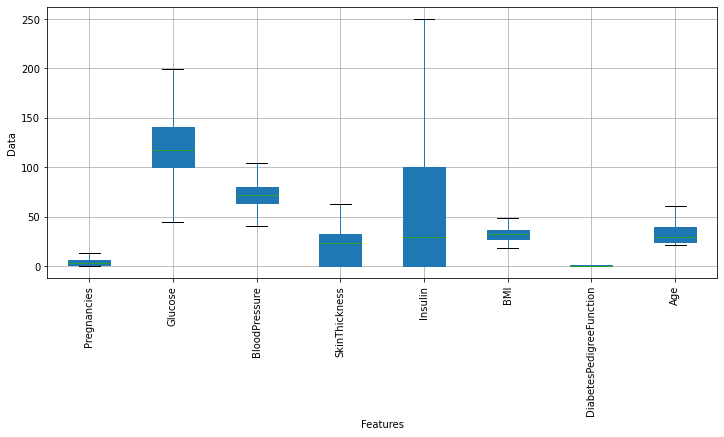

In [20]:
plt.subplots(figsize=(12,5))
X.boxplot(patch_artist=True, sym="k.")
plt.xlabel('Features')
plt.ylabel('Data')
plt.xticks(rotation=90)

In [21]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
scaled_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.678427,0.866045,-0.009945,0.928238,-0.792609,0.237708,1.017166,1.783188
1,-0.851320,-1.205066,-0.562070,0.545788,-0.792609,-0.876820,-0.260674,-0.102476
2,1.290326,2.016662,-0.746112,-1.302720,-0.792609,-1.402240,1.225510,-0.003231
3,-0.851320,-1.073567,-0.562070,0.163338,0.595090,-0.637992,-1.112568,-1.094931
4,-1.157270,0.504422,-2.954614,0.928238,1.687534,1.750281,-0.161132,0.096015


In [24]:
label = Data["Outcome"]

In [25]:
encoder = LabelEncoder()
label = encoder.fit_transform(label)

In [26]:
X = scaled_df
y = label 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [27]:
print(X_train.shape, y_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154,)
(614,) (154,)


In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

xnew2=SelectKBest(f_classif, k=8).fit_transform(X, y)

In [29]:
 import sklearn.feature_selection as fs
 import matplotlib.pyplot as plt
 df2 = fs.SelectKBest(k='all')

 df2.fit(X, y)

 names = X.columns.values[df2.get_support()]

 scores = df2.scores_[df2.get_support()]

 names_scores = list(zip(names, scores))

 ns_df = pd.DataFrame(data = names_scores, columns=

  ['Features','F_Scores'])

 ns_df_sorted = ns_df.sort_values(['F_Scores','Features'], ascending =

  [False, True])

 print(ns_df_sorted)

                   Features    F_Scores
1                   Glucose  245.667855
7                       Age   79.385372
5                       BMI   68.570153
0               Pregnancies   32.751176
2             BloodPressure   21.820218
6  DiabetesPedigreeFunction   14.502288
3             SkinThickness    3.489838
4                   Insulin    3.165892


# Stats models: Logit


In [30]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices
logit_model = sm.OLS(y_train, X_train)
result = logit_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.191    
Dependent Variable:     y                AIC:                         970.2026 
Date:                   2022-05-21 15:21 BIC:                         1005.5626
No. Observations:       614              Log-Likelihood:              -477.10  
Df Model:               8                F-statistic:                 19.12    
Df Residuals:           606              Prob (F-statistic):          9.64e-26 
R-squared (uncentered): 0.202            Scale:                       0.28064  
--------------------------------------------------------------------------------
                              Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
--------------------------------------------------------------------------------
Pregnancies                   0.0306    0.0273   1.1218  0.2624  -0.0230  0.0842
Glucose                       0.1904    0.0228   8.3587  0.0

In [32]:
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                                5%       95%  Odds Ratio
Pregnancies               0.977276  1.087873    1.031093
Glucose                   1.156788  1.265042    1.209705
BloodPressure             0.957890  1.048164    1.002011
SkinThickness             0.956949  1.059439    1.006891
Insulin                   0.937652  1.035633    0.985425
BMI                       1.044682  1.148563    1.095392
DiabetesPedigreeFunction  0.990578  1.081919    1.035241
Age                       1.001392  1.119166    1.058642


### GLM

In [271]:
# import statsmodels.formula.api as smf
# formula = 'status ~ ALQ120Q + BMXBMI + BMXHT + BMXLEG + BMXWAIST + BMXWT + BPQ020 + DMDEDUC2 + INDHHINC + LBXTC + MCQ250A + PAQ180 + RIAGENDR + RIDAGEYR + RIDRETH1'
# model = smf.glm(formula = y_train, X_train, family=sm.families.Binomial())
# result = model.fit()
# print(result.summary())

In [34]:
glm_binom = sm.GLM(y_train, X_train, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  614
Model:                            GLM   Df Residuals:                      606
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -330.27
Date:                Sat, 21 May 2022   Deviance:                       660.54
Time:                        15:21:46   Pearson chi2:                     653.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1936
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies             

In [299]:
# print("Coefficeients")
# print(result.params)
# print()
# print("p-Values")
# print(result.pvalues)
# print()
# print("Dependent variables")
# print(result.model.endog_names)


In [36]:
params1 = res.params
conf1 = res.conf_int()
conf1['Odds Ratio'] = params1
conf1.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf1))

                                5%       95%  Odds Ratio
Pregnancies               0.885609  1.431154    1.125807
Glucose                   2.167549  3.433233    2.727948
BloodPressure             0.768450  1.142762    0.937100
SkinThickness             0.804409  1.269444    1.010520
Insulin                   0.746777  1.160480    0.930925
BMI                       1.298550  2.012115    1.616425
DiabetesPedigreeFunction  1.031969  1.517536    1.251419
Age                       1.104633  1.821139    1.418341


In [ ]:
#from sklearn.utils import class_weight
#class_weights = class_weight.compute_class_weight('balanced',
                                                # np.unique(y_train),
                                                # y_train)
#model.fit(X_train, y_train, class_weight=class_weights)


Best parameters : {'class_weight': {0: 0.5236842105263158, 1: 0.47631578947368425}}


<AxesSubplot:xlabel='weight'>

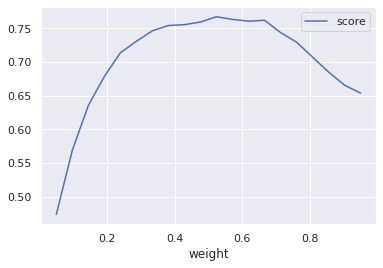

In [37]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='accuracy',
    cv=10
)
grid_result = gsc.fit(X, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

In [38]:
class_weight = {0: 0.5236842105263158,
                1: 0.47631578947368425}

In [ ]:
#LR

In [ ]:
#pip install mlxtend

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



0.7404040404040404

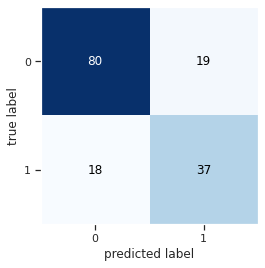

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from matplotlib import pyplot as plt
lr = LogisticRegression(class_weight='balanced',random_state=420)

# Fit..
lr.fit(X_train, y_train)

# Predict..
y_pred = lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        99
           1       0.70      0.76      0.73        55

    accuracy                           0.80       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.80      0.80      0.80       154



0.7909090909090909

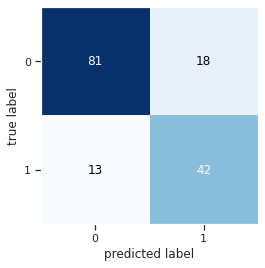

In [40]:
from sklearn.svm import SVC

clf_svc_rbf = SVC(kernel="rbf",class_weight='balanced',random_state=4200)
clf_svc_rbf.fit(X_train,y_train)
y_pred_clf_svc_rbf = clf_svc_rbf.predict(X_test)


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_clf_svc_rbf)

#plt.figure(figsize=(5,5))
#sns.heatmap(cm,annot=True)
#plt.show()

#print(classification_report(y_test,y_pred_clf_svc_rbf))

print(classification_report(y_test, y_pred_clf_svc_rbf))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_clf_svc_rbf))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_clf_svc_rbf)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        99
           1       0.68      0.51      0.58        55

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



0.6888888888888889

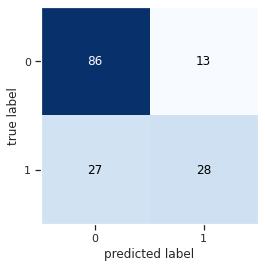

In [41]:
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier(class_weight='balanced',random_state=4200)
rd.fit(X_train,y_train)
y_pred_rd = rd.predict(X_test)


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_rd)

#plt.figure(figsize=(5,5))
#sns.heatmap(cm,annot=True,linewidths=.3)
#plt.show()

print(classification_report(y_test,y_pred_rd))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rd))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rd)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#CV appraoach

## SVM

In [42]:

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# create model
model = SVC(kernel='rbf', C=1, class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.7571 (0.0378)


array([0.74675325, 0.78571429, 0.79220779, 0.77272727, 0.68831169])

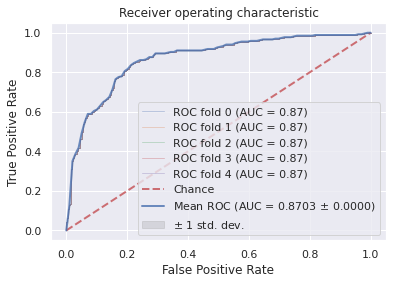

In [45]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold



# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
classifier = svm.SVC(kernel='rbf', probability=True, class_weight=class_weight,
                     random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X, y)
    viz = plot_roc_curve(classifier, X, y,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.show()


## LR

In [46]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# create model
model = LogisticRegression(class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.7662 (0.0229)


array([0.75974026, 0.78571429, 0.76623377, 0.79220779, 0.72727273])

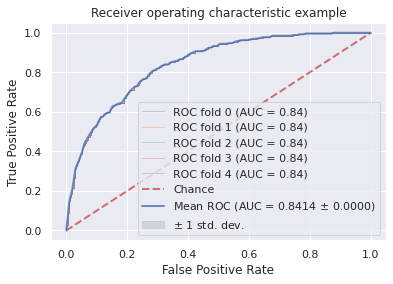

In [47]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#X, y = X[y != 2], y[y != 2]
#n_samples, n_features = X.shape

# Add noisy features
#random_state = np.random.RandomState(0)
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
classifier = LogisticRegression(class_weight=class_weight,random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X, y)
    viz = plot_roc_curve(classifier, X, y,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

## RF

In [49]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit

# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# create model
model = RandomForestClassifier(class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.7584 (0.0219)


array([0.75324675, 0.78571429, 0.75974026, 0.77272727, 0.72077922])

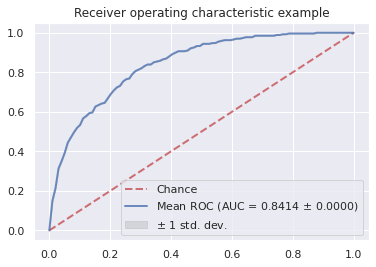

In [50]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#X, y = X[y != 2], y[y != 2]
#n_samples, n_features = X.shape

# Add noisy features
#random_state = np.random.RandomState(0)
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(class_weight=class_weight,random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X, y)
    #viz = plot_roc_curve(classifier, X, y,
                        # name='ROC fold {}'.format(i),
                         # alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

## DT

In [56]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=4200)
# create model
model = DecisionTreeClassifier(class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.6883 (0.0461)


array([0.73376623, 0.63636364, 0.73376623, 0.70779221, 0.62987013])

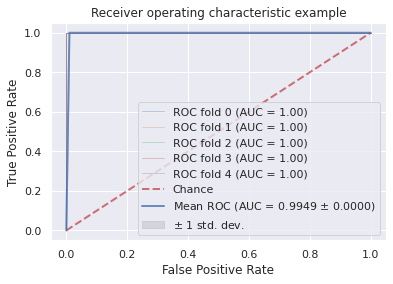

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#X, y = X[y != 2], y[y != 2]
#n_samples, n_features = X.shape

# Add noisy features
#random_state = np.random.RandomState(0)
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=4200)
classifier = DecisionTreeClassifier(class_weight=class_weight,random_state=4200)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X, y)
    viz = plot_roc_curve(classifier, X, y,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [ ]:
#from sklearn.model_selection import cross_val_score
#from sklearn import svm
#clf = svm.SVC(kernel='rbf', C=1, class_weight=class_weight)
#scores = cross_val_score(clf, X, y, cv=5)
#print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

#clf.score(X_test, y_test)

## ANN

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [59]:
classifier=Sequential()
classifier.add(Dense(units=256, kernel_initializer='uniform',activation='relu',input_dim=8))
classifier.add(Dense(units=128, kernel_initializer='uniform',activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=64, kernel_initializer='uniform',activation='relu'))
classifier.add(Dropout(rate=0.3))
classifier.add(Dense(units=32, kernel_initializer='uniform',activation='relu'))

classifier.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=10,epochs=100,class_weight=class_weight)

Epoch 1/100
62/62 [==============================] - 0s 766us/step - loss: 0.3126 - accuracy: 0.6547
Epoch 2/100
62/62 [==============================] - 0s 777us/step - loss: 0.2446 - accuracy: 0.7606
Epoch 3/100
62/62 [==============================] - 0s 805us/step - loss: 0.2362 - accuracy: 0.7752
Epoch 4/100
62/62 [==============================] - 0s 794us/step - loss: 0.2335 - accuracy: 0.7785
Epoch 5/100
62/62 [==============================] - 0s 778us/step - loss: 0.2342 - accuracy: 0.7932
Epoch 6/100
62/62 [==============================] - 0s 798us/step - loss: 0.2349 - accuracy: 0.7769
Epoch 7/100
62/62 [==============================] - 0s 766us/step - loss: 0.2311 - accuracy: 0.7866
Epoch 8/100
62/62 [==============================] - 0s 755us/step - loss: 0.2347 - accuracy: 0.7899
Epoch 9/100
62/62 [==============================] - 0s 758us/step - loss: 0.2289 - accuracy: 0.7899
Epoch 10/100
62/62 [==============================] - 0s 782us/step - loss: 0.2261 - accura

62/62 [==============================] - 0s 752us/step - loss: 0.0203 - accuracy: 0.9853
Epoch 82/100
62/62 [==============================] - 0s 763us/step - loss: 0.0078 - accuracy: 0.9984
Epoch 83/100
62/62 [==============================] - 0s 763us/step - loss: 0.0277 - accuracy: 0.9805
Epoch 84/100
62/62 [==============================] - 0s 742us/step - loss: 0.0949 - accuracy: 0.9463
Epoch 85/100
62/62 [==============================] - 0s 747us/step - loss: 0.0450 - accuracy: 0.9674
Epoch 86/100
62/62 [==============================] - 0s 755us/step - loss: 0.0214 - accuracy: 0.9853
Epoch 87/100
62/62 [==============================] - 0s 749us/step - loss: 0.0606 - accuracy: 0.9658
Epoch 88/100
62/62 [==============================] - 0s 753us/step - loss: 0.0354 - accuracy: 0.9739
Epoch 89/100
62/62 [==============================] - 0s 738us/step - loss: 0.0220 - accuracy: 0.9919
Epoch 90/100
62/62 [==============================] - 0s 745us/step - loss: 0.0138 - accuracy: 

In [77]:
#clf_svc_rbf.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,auc,f1_score

y_pred = classifier.predict(X_test)>0.8


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)

#plt.figure(figsize=(5,5))
#sns.heatmap(cm,annot=True)
#plt.show()

#print(classification_report(y_test,y_pred_clf_svc_rbf))

print(classification_report(y_test, y_pred))
#plot_confusion_matrix(confusion_matrix(y_test, y_pred))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        99
           1       0.59      0.47      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.69       154



0.6454545454545454

In [62]:
# Accuracy of ANN
classifier.evaluate(X_test,y_test )

5/5 [==============================] - 0s 734us/step - loss: 1.7179 - accuracy: 0.7338


[1.7179450988769531, 0.7337662577629089]

In [304]:
# from sklearn.tree import DecisionTreeClassifier


# from sklearn.model_selection import cross_val_score

# dt = DecisionTreeClassifier(class_weight=class_weight)
# scores = cross_val_score(clf, X, y, cv=5)
# print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

In [ ]:
'''

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,auc,f1_score

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_logistic = lr.predict(X_test)

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_logistic)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=.3)
plt.show()

print(classification_report(y_test,y_pred_logistic))


from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_logistic)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
print(f1_score(y_test, y_pred_logistic,average="macro"))
'''

In [63]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [64]:
clf1 = SVC(kernel='rbf', C=1, class_weight=class_weight,random_state=42)
clf2 = LogisticRegression(class_weight=class_weight,random_state=42)
clf3 = RandomForestClassifier(class_weight=class_weight,random_state=42)
clf4 = DecisionTreeClassifier(class_weight=class_weight,random_state=42)
#clf5 = Sequential()

In [65]:
eclf = VotingClassifier( estimators=[('svm', clf1), ('lr', clf2), ('rf', clf3), ('dt',clf4)],
     voting='hard')

In [66]:
for clf, label in zip([clf1, clf2, clf3,clf4 ,eclf], ['SVM', 'LR', 'RF','DT', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))
scores

Accuracy: 0.7670 (+/- 0.0287) [Ensemble]


array([0.76623377, 0.73376623, 0.77272727, 0.81699346, 0.74509804])